In [27]:
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import PIL

In [4]:
h = open('TrajectoryData_students003/students003.txt', 'r')
f = open('TrajectoryData_students003/processed_student003.txt','w')
f.write('timestep ID X Y')
f.write('\n')
content = h.readlines()
for line in content:
    for element in line.split():
        f.write(element)
        f.write(' ')
    f.write('\n')

In [5]:
df = pd.read_csv("TrajectoryData_students003/processed_student003.txt", delimiter=" ",index_col=False)
df

,timestep,ID,X,Y
0,0.0,1.0,9.050000,6.038093
1,0.0,2.0,11.344069,7.398454
2,0.0,3.0,6.082442,3.603763
3,0.0,4.0,2.273023,6.205155
4,0.0,5.0,13.680232,6.539279
...,...,...,...,...
17839,5350.0,299.0,14.368663,5.450513
17840,5350.0,338.0,3.697241,11.511278
17841,5350.0,339.0,3.754487,12.187163
17842,5350.0,375.0,11.913167,11.273096


In [6]:
class Person:
    def __init__(self):
        self.ID=None
        self.loc=[None,None]
        self.color=None
    
    def set_ID(self,ID):
        self.ID=ID
    def set_loc(self,x,y):
        self.loc=[x,y]
    def set_color(self,color):
        self.color=color

step_num=int(df['timestep'][len(df)-1]/10)
# To store person step by step
persons=np.empty(step_num+1, dtype=object)
persons[:]=[[] for _ in range(step_num+1)]

for index in range(0,len(df)):
    person_temp=Person()
    person_temp.set_ID(df.loc[index]['ID'])
    person_temp.set_loc(df.loc[index]['X'],df.loc[index]['Y'])
    step=int(df.loc[index]['timestep']/10)
    persons[step].append(person_temp)

db+label:  [ 0  0  0  1  0  0 -1  0  0  1  1  1  1  0  0  0 -1 -1 -1 -1 -1 -1 -1  0
  0  0  0  0  0]
km_label:  [1 2 1 0 2 2 1 1 2 0 0 0 0 2 2 2 1 1 2 0 0 0 0 1 0 1 1 2 1]


<function matplotlib.pyplot.show(close=None, block=None)>

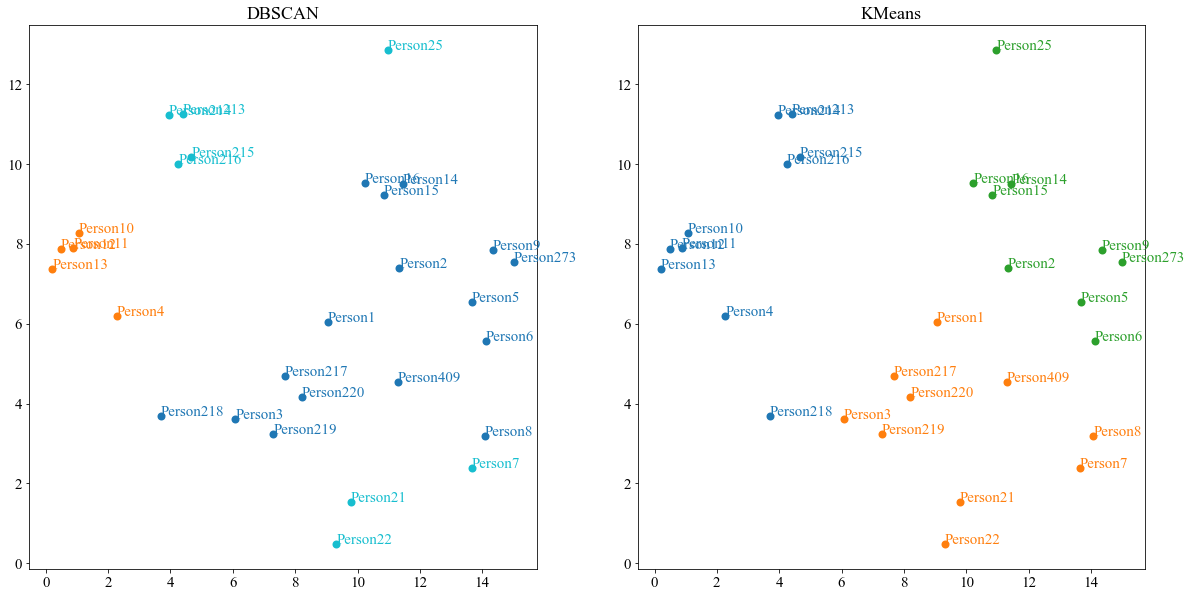

In [31]:
def get_color(group_label):
    cmap = plt.cm.get_cmap('tab10')  # Choose a colormap
    color_index = group_label % 10  # Map integer to the range [0, 9]
    color = cmap(color_index)  # Get the corresponding color from the colormap
    return color

X = np.array([person.loc for person in persons[0]])
dbscan = DBSCAN(eps=3, min_samples=5,metric='euclidean')
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
dbscan.fit(X)
db_labels = dbscan.labels_
kmeans.fit(X)
km_labels=kmeans.labels_
print("db+label: ",db_labels)
print("km_label: ",km_labels)

rc = {"font.family": "serif", "mathtext.fontset": "cm", "font.size": 15}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

fig,ax=plt.subplots(1,2,figsize=(20, 10))
for i in range(0,len(persons[0])):
    person=persons[0][i]
    color_db=get_color(db_labels[i])
    color_km=get_color(km_labels[i])
    name="Person"+str(int(person.ID))
    ax[0].scatter(person.loc[0],person.loc[1],linewidth=2,color=color_db)
    ax[0].text(person.loc[0],person.loc[1],name,color=color_db)
    ax[0].set_title("DBSCAN")
    ax[1].scatter(person.loc[0],person.loc[1],linewidth=2,color=color_km)
    ax[1].text(person.loc[0],person.loc[1],name,color=color_km)
    ax[1].set_title("KMeans")
plt.show


KeyboardInterrupt: 

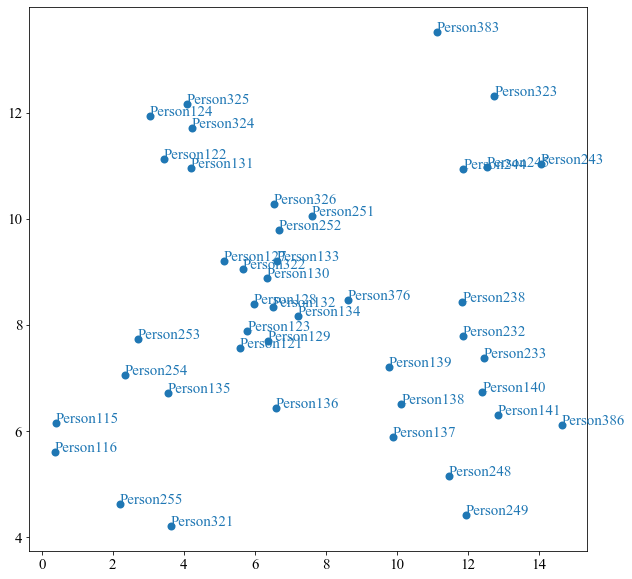

In [18]:
list_image = []
for i in range(step_num+1):
    X = np.array([person.loc for person in persons[0]])
    dbscan = DBSCAN(eps=3, min_samples=5,metric='euclidean')
    kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
    dbscan.fit(X)
    db_labels = dbscan.labels_
    kmeans.fit(X)
    km_labels=kmeans.labels_
    fig,ax=plt.subplots(1,2,figsize=(20, 10))
    for i in range(0,len(persons[0])):
        person=persons[0][i]
        color_db=get_color(db_labels[i])
        color_km=get_color(km_labels[i])
        name="Person"+str(int(person.ID))
        ax[0].scatter(person.loc[0],person.loc[1],linewidth=2,color=color_db)
        ax[0].text(person.loc[0],person.loc[1],name,color=color_db)
        ax[0].set_title("DBSCAN")
        ax[1].scatter(person.loc[0],person.loc[1],linewidth=2,color=color_km)
        ax[1].text(person.loc[0],person.loc[1],name,color=color_km)
        ax[1].set_title("KMeans")
        
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format="png")
    image = PIL.Image.open(img_buf)
    list_image.append(image)
    plt.close()
    
# save animation
list_image[0].save(
    "media/person_cluster.gif",
    format="GIF",
    append_images=list_image[1:],
    save_all=True,
    duration=0.1,
    loop=0,
)